## 3.1 배깅 앙상블

### 3.1.1 앙상블 방법

### 3.1.2 배깅

## 3.2 랜덤 포레스트 살펴보기

### 3.2.1 랜덤 포레스트 분류 모델

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_census = pd.read_csv('data/census_cleaned.csv')
X_census = df_census.iloc[:, :-1]
y_census = df_census.iloc[:, -1]

In [4]:
rf = RandomForestClassifier(n_estimators=10, random_state=2, n_jobs=-1)

In [5]:
scores = cross_val_score(rf, X_census, y_census, cv=5)

In [6]:
print('정확도:', np.round(scores, 3))
print('정확도 평균: %0.3f' % (scores.mean()))

정확도: [0.844 0.842 0.853 0.856 0.785]
정확도 평균: 0.836


### 3.2.2 랜덤 포레스트 회귀 모델

In [7]:
df_bikes = pd.read_csv('data/bike_rentals_cleaned.csv')
df_bikes.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1.0,0.0,1,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1.0,0.0,1,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1.0,0.0,1,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1.0,0.0,1,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1.0,0.0,1,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600


In [8]:
X_bikes = df_bikes.iloc[:, :-1]
y_bikes = df_bikes.iloc[:, -1]

In [9]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10, random_state=2, n_jobs=-1)

In [10]:
scores = cross_val_score(rf, X_bikes, y_bikes, scoring='neg_mean_squared_error', cv=10)

In [11]:
rmse = np.sqrt(-scores)
print('RMSE:', np.round(rmse, 3))
print('RMSE 평균: %0.3f' % (rmse.mean()))

RMSE: [ 801.486  579.987  551.347  846.698  895.05  1097.522  893.738  809.284
  833.488 2145.046]
RMSE 평균: 945.365


## 3.3 랜덤 포레스트 매개변수

### 3.3.1 oob_score

In [12]:
rf = RandomForestClassifier(oob_score=True, n_estimators=10, random_state=2, n_jobs=-1)

In [13]:
rf.fit(X_census, y_census)

RandomForestClassifier(n_estimators=10, n_jobs=-1, oob_score=True,
                       random_state=2)

In [14]:
rf.oob_score_

0.8319461932987317

### 3.3.2 n_estimators

In [15]:
rf = RandomForestClassifier(oob_score=True, n_estimators=50, random_state=2, n_jobs=-1)
rf.fit(X_census, y_census)
rf.oob_score_

0.8554098461349467

In [16]:
rf = RandomForestClassifier(oob_score=True, n_estimators=100, random_state=2, n_jobs=-1)
rf.fit(X_census, y_census)
rf.oob_score_

0.8593716409201192

### 3.3.3 warm_start

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

In [18]:
oob_scores = []
rf = RandomForestClassifier(n_estimators=50, warm_start=True, oob_score=True, n_jobs=-1, random_state=2)

In [19]:
rf.fit(X_census, y_census)
oob_scores.append(rf.oob_score_)

In [20]:
est = 50
estimators=[est]

In [21]:
for i in range(9):
    est += 50
    estimators.append(est)
    rf.set_params(n_estimators=est)
    rf.fit(X_census, y_census)
    oob_scores.append(rf.oob_score_)

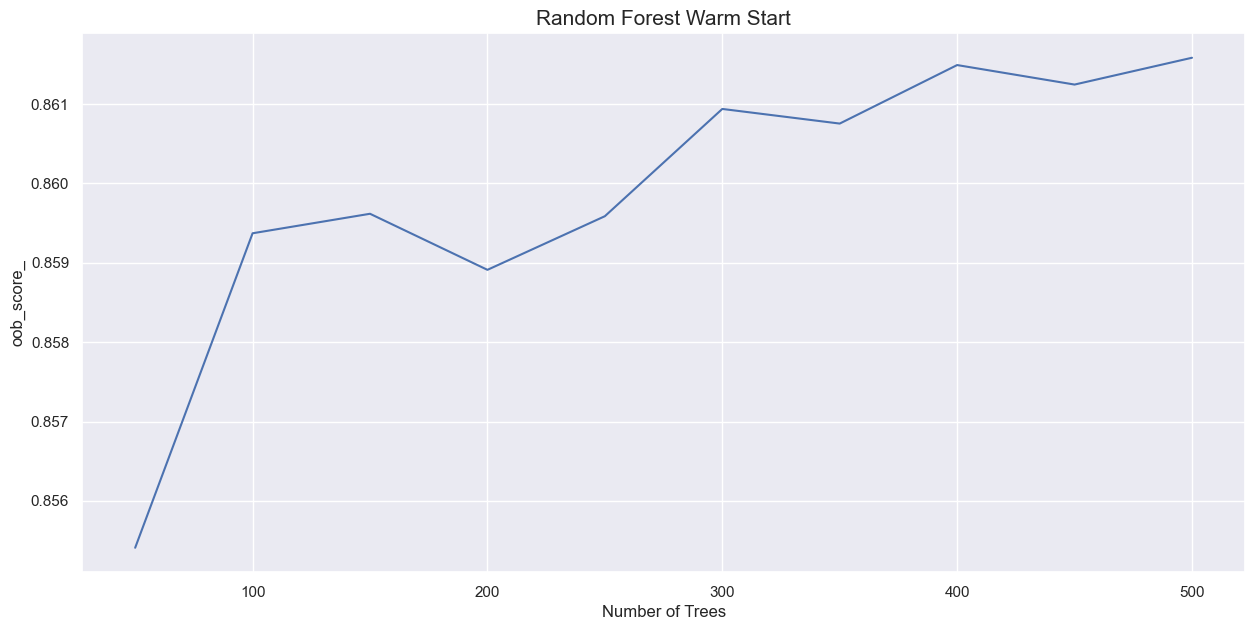

In [22]:
plt.figure(figsize=(15, 7))
plt.plot(estimators, oob_scores)
plt.xlabel('Number of Trees')
plt.ylabel('oob_score_')
plt.title('Random Forest Warm Start', fontsize=15)
plt.show()

### 3.3.4 bootstrap

### 3.3.5 verbose

### 3.3.6 결정 트리 매개변수 

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split, cross_validate

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_census, y_census, random_state=2)
et = ExtraTreesClassifier(n_estimators=100, random_state=2, n_jobs=-1)
cv_results = cross_validate(et, X_train, y_train)
print('교차 검증 평균 점수:', np.mean(cv_results['test_score']))

교차 검증 평균 점수: 0.8482391482391481


## 3.4 랜덤 포레스트 성능 높이기 - 사례 연구

### 3.4.1 데이터셋 준비

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bikes, y_bikes, random_state=2)

### 3.4.2 n_estimators

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
rmse_scores = []
estimators = []

In [28]:
rf = RandomForestRegressor(warm_start=True, n_jobs=-1, random_state=2)
est = 10

In [29]:
for i in range(21):
    rf.set_params(n_estimators=est)
    rf.fit(X_train, y_train)
    rmse = mean_squared_error(y_test, rf.predict(X_test), squared=False)
    rmse_scores.append(rmse)
    estimators.append(est)
    est += 25

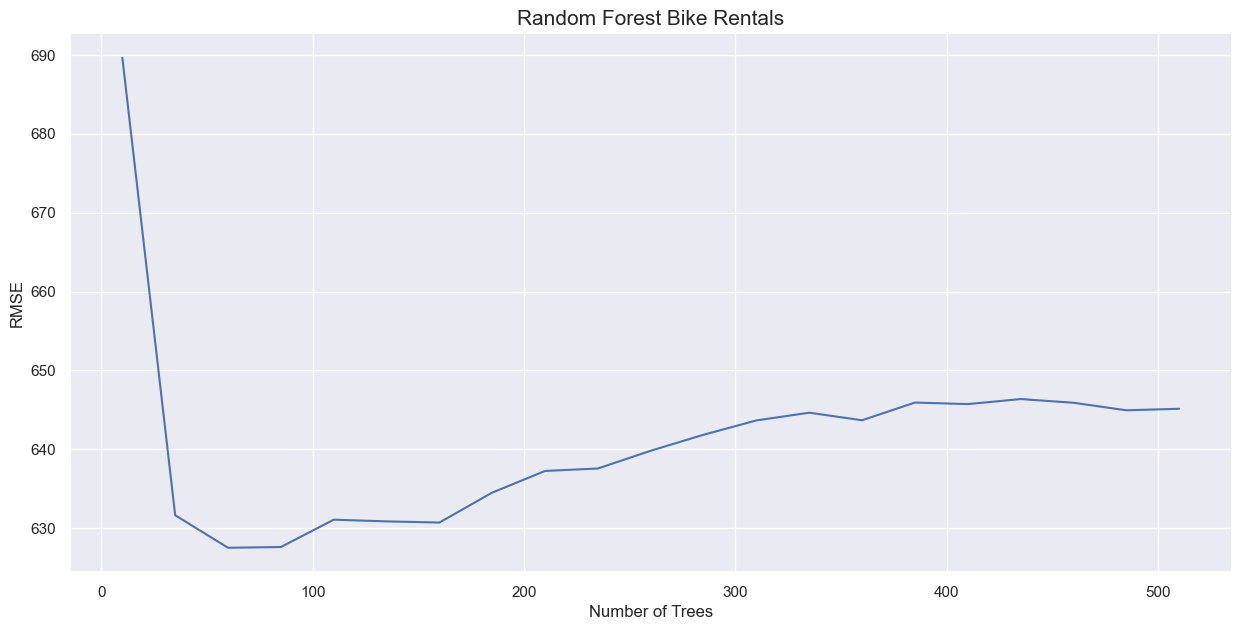

In [30]:
plt.figure(figsize=(15, 7))
plt.plot(estimators, rmse_scores)
plt.xlabel('Number of Trees')
plt.ylabel('RMSE')
plt.title('Random Forest Bike Rentals', fontsize=15)
plt.show()

### 3.4.3 cross_val_score

In [31]:
rf = RandomForestRegressor(n_estimators=50, warm_start=True, n_jobs=-1, random_state=2)
scores = cross_val_score(rf, X_bikes, y_bikes, scoring='neg_mean_squared_error', cv=10)
rmse = np.sqrt(-scores)
print('RMSE:', np.round(rmse, 3))
print('RMSE 평균:: %0.3f' % (rmse.mean()))

RMSE: [ 836.482  541.898  533.086  812.782  894.877  881.117  794.103  828.968
  772.517 2128.148]
RMSE 평균:: 902.398


### 3.4.4 하이퍼파라미터 튜닝

In [32]:
from sklearn.model_selection import RandomizedSearchCV
def randomized_search_reg(params, runs=16, reg=RandomForestRegressor(random_state=2, n_jobs=-1)):
    rand_reg = RandomizedSearchCV(reg, params, n_iter=runs, scoring='neg_mean_squared_error', cv=10, n_jobs=-1, random_state=2)
    rand_reg.fit(X_train, y_train)
    best_model = rand_reg.best_estimator_
    best_params = rand_reg.best_params_
    best_score = np.sqrt(-rand_reg.best_score_)
    print('최상의 매개변수:', best_params)
    print('훈련 점수: {: .3f}'.format(best_score))
    y_pred = best_model.predict(X_test)
    from sklearn.metrics import mean_squared_error as MSE
    rmse_test = MSE(y_test, y_pred)**0.5
    print('테스트 세트 점수: {:.3f}'.format(rmse_test))

In [35]:
randomized_search_reg(
    params={
        'min_weight_fraction_leaf': [0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05],
        'min_samples_split': [2, 0.01, 0.02, 0.03, 0.04, 0.06, 0.08, 0.1],
        'min_samples_leaf': [1, 2, 4, 6, 8, 10, 20, 30],
        'min_impurity_decrease': [0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
        'max_leaf_nodes': [10, 15, 20, 25, 30, 35, 40, 45, 50, None],
        'max_features': ['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
        'max_depth': [None, 2, 4, 6, 8, 10, 20]
    })

최상의 매개변수: {'min_weight_fraction_leaf': 0.0, 'min_samples_split': 0.03, 'min_samples_leaf': 6, 'min_impurity_decrease': 0.05, 'max_leaf_nodes': 25, 'max_features': 0.7, 'max_depth': None}
훈련 점수:  759.076
테스트 세트 점수: 701.802


In [42]:
randomized_search_reg(
    params={
        'min_samples_leaf': [1, 2, 4, 6, 8, 10, 20, 30],
        'min_impurity_decrease': [0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
        'max_features': ['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
        'max_depth': [None, 4, 6, 8, 10, 12, 15, 20]
    }, runs=20)

최상의 매개변수: {'min_samples_leaf': 1, 'min_impurity_decrease': 0.1, 'max_features': 0.6, 'max_depth': 12}
훈련 점수:  675.128
테스트 세트 점수: 619.014


In [44]:
randomized_search_reg(
    params={
        'min_samples_leaf': [1, 2, 3, 4, 5, 6],
        'min_impurity_decrease': [0.0, 0.01, 0.05, 0.08, 0.10, 0.12, 0.15],
        'max_features': ['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
        'max_depth': [None, 4, 6, 8, 10, 12, 15, 20],
        'n_estimators': [100]
    }, runs=20)

최상의 매개변수: {'n_estimators': 100, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.05, 'max_features': 0.7, 'max_depth': 15}
훈련 점수:  673.175
테스트 세트 점수: 632.693


In [45]:
from sklearn.utils import shuffle

In [55]:
df_shuffle_bikes = shuffle(df_bikes, random_state=2)

In [56]:
df_shuffle_bikes

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
671,672,4.0,1.0,11,0.0,5.0,1.0,1,0.355000,0.356042,0.522083,0.266175,5847
199,200,3.0,0.0,7,0.0,2.0,1.0,1,0.776667,0.747479,0.650417,0.130600,4541
77,78,1.0,0.0,3,0.0,6.0,0.0,1,0.472500,0.466525,0.379167,0.368167,3117
225,226,3.0,0.0,8,0.0,0.0,0.0,2,0.676667,0.624388,0.817500,0.222633,3820
37,38,1.0,0.0,2,0.0,1.0,1.0,1,0.271667,0.303658,0.738333,0.045408,1712
...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,535,2.0,1.0,6,0.0,1.0,1.0,2,0.568333,0.544842,0.777917,0.174746,5099
584,585,3.0,1.0,8,0.0,2.0,1.0,2,0.735833,0.697621,0.703750,0.116908,7273
493,494,2.0,1.0,5,0.0,2.0,1.0,2,0.581667,0.557471,0.685833,0.296029,5728
527,528,2.0,1.0,6,0.0,1.0,1.0,2,0.720833,0.659721,0.587917,0.207713,6664


In [57]:
X_shuffle_bikes = df_shuffle_bikes.iloc[:,:-1]
y_shuffle_bikes = df_shuffle_bikes.iloc[:,-1]

In [61]:
rf = RandomForestRegressor(
    n_estimators=100, 
    min_impurity_decrease=0.1, 
    max_features=0.6, 
    max_depth=12,
    n_jobs=-1,
    random_state=2
)
scores = cross_val_score(rf, X_shuffle_bikes, y_shuffle_bikes, scoring='neg_mean_squared_error', cv=10)
rmse = np.sqrt(-scores)
print('RMSE:', np.round(rmse, 3))
print('RMSE 평균: %0.3f' % (rmse.mean()))

RMSE: [630.093 686.673 468.159 526.676 593.033 724.575 774.402 672.63  760.253
 616.797]
RMSE 평균: 645.329


## 3.5 마치며 